In [1]:
#Checking the version of Python

from platform import python_version
print(python_version())

3.8.3


## 1. Data Acquisition

In [2]:
# Import required packages to start
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [3]:
#creating the raw pandas dataframe
df = pd.read_csv("C:/Users/bozor/Documents/WGU MSDA/Data Mining I/medical_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


## 2. Exploring the Data

In [4]:
#Checking dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

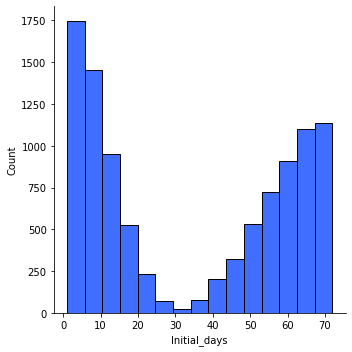

In [5]:
# Distribution of days patients stayed in the hospital

sns.displot(df.Initial_days)
plt.savefig('fig.jpg')
plt.show()

In [6]:
#The features in the dataframe
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
#eliminating variables that have no importance in our analysis

column = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 
          'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Job'
         ]

new_df = df.drop(columns=column)
new_df.head()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,Married,Female,No,18.940352,4,2,1,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,Married,Male,No,16.576858,4,1,0,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [8]:
#List of remaining features
new_df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [9]:
#Creating two lists, containing continuous and categorical variables

cont_var = ['Children', 'Age', 'Income','VitD_levels', 'Doc_visits', 'Full_meals_eaten',
            'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1',
            'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
cat_var = [i for i in new_df.columns if i not in cont_var]

print('Continuous variables are:\n\n {} \n\n and Categorical variables are:\n\n {}'.format(cont_var, cat_var))

Continuous variables are:

 ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'] 

 and Categorical variables are:

 ['Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']


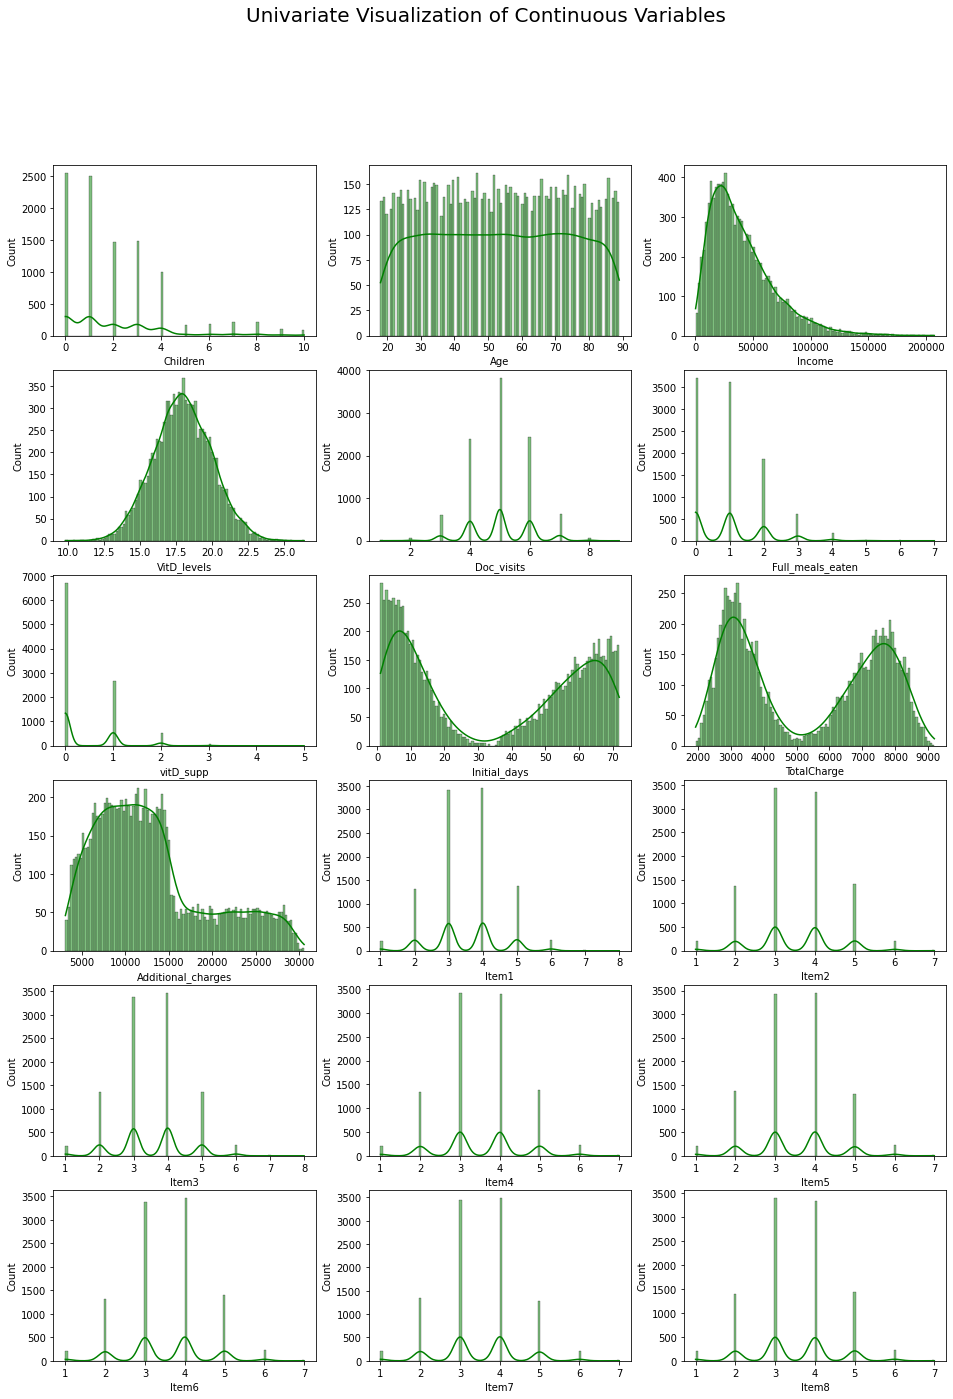

In [10]:
list1 = np.array(cont_var).reshape(6,3)

fig, axes = plt.subplots(6, 3, figsize=(16,22))
fig.suptitle('Univariate Visualization of Continuous Variables', fontsize=20)
for index, var in np.ndenumerate(list1):
    sns.histplot(ax=axes[index[0], index[1]], data=new_df, x=var, kde=True, color='green', bins='sqrt')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.savefig('fig.jpg')
plt.show()

## 3. Data Wrangling

In [11]:
# Removing variables that theoretically can not affect the dependent variable:

new_df.drop(columns=['ReAdmis'], inplace=True)

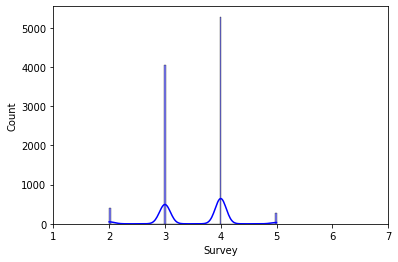

In [12]:
# Creating a new feature by averaging all the 8 questions in survey:

surv = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
new_df['Survey'] = new_df[surv].astype(float).mean(axis=1).round()
new_df.drop(columns=surv, inplace=True)

#Graphing the new feature

sns.histplot(data=new_df, x='Survey', kde=True, color='blue', bins='sqrt')
plt.xticks(range(1,8,1))
plt.savefig('fig.jpg')
plt.show()

In [13]:
# creating dummy variables for all categorical features 

cleaned_df = pd.get_dummies(new_df, drop_first=True)
cleaned_df.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,...,1,0,1,1,1,0,1,0,0,0
1,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,...,0,0,0,0,0,1,0,0,1,0
2,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,...,1,0,0,0,0,0,0,0,0,0
3,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,...,0,0,0,0,0,1,1,0,0,0
4,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,...,0,1,0,0,1,0,0,1,0,0


In [14]:
# Saving the cleaned dataset into a csv file.

cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [15]:
#Seaparating independent and dependent variables

X = cleaned_df.drop(columns='Initial_days')
y = cleaned_df[['Initial_days']]
y = y.values.reshape(-1,)
X.shape

(10000, 35)

## 4. Creating the Model

In [16]:
# Holding out 30% of the data for final evaluation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [17]:
# Tuning the hyper parameters using GridSearchCV:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE



rfr = RandomForestRegressor(n_estimators = 200, random_state=777)
h_param = {'max_depth' : [4, 6, 8]
          }

cv = GridSearchCV(rfr, param_grid=h_param, cv=10, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=200,
                                             random_state=777),
             n_jobs=-1, param_grid={'max_depth': [4, 6, 8]})

In [18]:
# The best parameters and score:

print('THe best max_depth is {} and the R2 obtained from the best model is {}'.format(
                                                                                    cv.best_params_['max_depth'], 
                                                                                    round(cv.best_score_, 3))) 


THe best max_depth is 8 and the R2 obtained from the best model is 0.997


In [19]:
# The scores obtained from predicting test set:

y_pred = cv.best_estimator_.predict(X_test)

print("The scores for the test set:\n\n R2: {:.3f} \n MSE: {:.3f} \n RMSE:{:.3f}".format(
                                            cv.best_estimator_.score(X_test, y_test),
                                            MSE(y_test, y_pred),
                                            MSE(y_test, y_pred)**(1/2)))


The scores for the test set:

 R2: 0.997 
 MSE: 1.798 
 RMSE:1.341
